[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_18_b__Redes_Neurais_com_PyTorch.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/master/notebooks/Aula_18_b_Redes_Neurais_com_PyTorch.ipynb)

# Redes Neurais com PyTorch

**Objetivos**: Aprender Redes Neurais Artificiais (RNA) usando a biblioteca `PyTorch`.

## PyTorch

[**PyTorch**](https://www.pytorch.org/) é uma biblioteca de código aberto para aprendizado de máquina aplicável a uma ampla variedade de tarefas. Foi criada pelo **Facebook** em 2016 é a principal biblioteca para criação e treinamento de redes neurais artificiais. A API toda é escrita em Python mas é executada em C++ na CPU ou em CUDA na GPU.

No momento que eu escrevo esse tutorial (Abril de 2021), PyTorch está superando o TensorFlow (Google) em desempenho e adoção de uso. Isso acontece tanto na [academia](http://horace.io/pytorch-vs-tensorflow/) (mensurado pela adoção de artigos científicos nos principais encontros científicos de Aprendizagem Profunda e Aprendizagem de Márquina) quanto na [indústria](https://www.infoworld.com/article/3597904/why-enterprises-are-turning-from-tensorflow-to-pytorch.html) (mensurado pela adoção de grandes e renomadas empresas de tecnologia).

<iframe width="560" height="315" src="https://www.youtube.com/embed/u7x8RXwLKcA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## O que é uma Rede Neural Artificial?

Redes neurais artificiais (RNAs) são modelos computacionais inspirados pelo sistema nervoso central (em particular o cérebro) que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. Redes neurais artificiais geralmente são apresentadas como sistemas de "neurônios interconectados, que podem computar valores de entradas", simulando o comportamento de redes neurais biológicas.

<img src="images/redes_neurais.jpeg" alt="redes neurais" style="width: 500px;"/>

## Como a rede neural aprende?

Em cada neurônio há uma função de ativação (*activation function*) que processa uma combinação linear entre inputs e pesos sinápticos, gerando assim um sinal de saída.

A informação flui da *input layer* para as *hidden layers* e por fim para a *output layer*. Nesse fluxo os inputs de dados da *input layer* são alimentados para os neurônios das *hidden layers* que por fim alimentam o neurônio final da *output layer*.

A primeira passada de informação (propagação) pela rede é geralmente feita com parâmetros aleatórios para as funções de ativação dos neurônios.

Ao realizar a propagação, chamada de *feed forward*, temos sinais de saídas nos neurônios da output layer. 

No fim da propagação, a função custo (uma métrica de erro) é calculada e o modelo então ajusta os parâmetros dos neurônios na direção de um menor custo (por meio do gradiente - derivada multivariada).

Assim uma nova propagação é gerada e a numa nova função custo e calculada. Assim como é realizado a atualização dos parâmetros dos neurônios.

O nome desse algoritmo é **Retro-propagação** (*Backpropagation*). E cada vez que ele é executado denomina-se como época (*epoch*). E quandos as épocas estabelecidas se encerram, a rede neural encerra o seu treinamento/aprendizagem.

<img src="images/backpropagation.gif" alt="backpropagation" style="width: 500px;"/>

## Funções de Ativação

| **Sigmoid**                                                  | **Tanh**                                                     | **ReLU**                                                     | **Leaky ReLU**                                               |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| $g(z)=\frac{1}{1+e^{-z}}$                                    | $g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$                     | $g(z)=\max (0, z)$                                           | $\begin{array}{c}{g(z)=\max (\epsilon z, z)} \\ {\text { com } \epsilon \ll 1}\end{array}$ |
| ![Illustration](images/sigmoid.png) | ![Illustration](images/tanh.png) | ![Illustration](images/relu.png) | ![Illustration](images/leaky-relu.png) |



### Estruturação dos módulos de PyTorch

```python
import torch
```

* [`torch.nn`](https://pytorch.org/docs/stable/nn.html) - Redes Neurais (_**N**eural **N**etworks_)
* [`torch.optim`](https://pytorch.org/docs/stable/optim.html) - Otimização (_**Optim**ization_)
* [`torch.data`](https://pytorch.org/docs/stable/data.html) - *Datasets* e Ferramentas de Streaming de Dados
* [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) - Diferenciação Automática (_**Auto**matic Differentiation_)
* [`torch.vision`](https://pytorch.org/docs/stable/torchvision/index.html) - Ferramentas de Manipulação de Imagens e Visão Computacional
* [`torch.audio`](https://pytorch.org/audio/stable/index.html) - Ferramentas de Manipulação de Áudio
* [`torch.jit`](https://pytorch.org/docs/stable/jit.html) - Compilação _**j**ust-**i**n-**t**time_ de modelos PyTorch em binários


## Algoritmos de Otimização

Keras possui diversos:
* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Adamax

Os mais importantes são o SGD e o Adam

### SGD - Stochastic Gradient Descent

[`torch.optim.sgd()`](https://pytorch.org/docs/stable/_modules/torch/optim/sgd.html):

* `lr` - Taxa de Aprendizagem $\eta > 0$
* `momentum=0.0` - hyperparâmetro $\geq 0$ que acelera o *gradient descent* na direção relevante e mitiga oscilações. 
* `nesterov=False` - `bool` para se aplica *Nesterov Momentum* ou não. *Nesterov Momentum* usa posições intermediárias do gradiente no cálculo do *momentum*. Proposto por Yuri Nesterov em 1983.
    

### Momentum

<img src="images/momentum.gif" alt="momentum" style="width: 300px;"/>

### Adam

Adam é um método de SGD que usa uma estimativa adaptativa dos momentos de primeira ordem e momentos de segunda ordem. Proposto por Kingma & Ba (2014).

[`torch.optim.Adam()`](https://pytorch.org/docs/stable/_modules/torch/optim/adam.html):

* `lr=0.001` - Taxa de Aprendizagem $\eta > 0$. Valor padrão menor que o do `SGD()`.
* `betas=(0.9, 0.999)` O decrescimento exponencial da estimativa dos momentos de primeira ordem (`betas[0]`) e o decrescimento exponencial da estimativa dos momentos de segunda ordem (`betas[1]`).

### Momentum

<img src="images/comparacao_otimizadores.gif" alt="comparacao_otimizadores" style="width: 500px;"/>

### Momentum

<img src="images/opt1.gif" alt="comparacao_otimizadores_2" style="width: 500px;"/>

### Momentum

<img src="images/opt2.gif" alt="comparacao_otimizadores_3" style="width: 500px;"/>

## Funções Custo

As funções custos se dividem em dois tipos:

1. Funções Custo de **Classificação**
2. Funções Custo de **Regressão**

### Funcões Custo de Classificação

Mais utilizadas


* *Binary Cross-entropy* (Entropia cruzada binária): [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
* *Categorical Cross-entropy - Negative Log-Likelihood Loss* (Entropia cruzada categórica): [`torch.nn.NLLLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html)

### Funcões Custo de Regressão

Mais utilizadas
* MSE - *Mean Squared Error* (Erro quadrado médio): [`torch.nn.MSELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
* MAE - *Mean Absolute Error - $\| . \|_1$* (Erro absoluto médio): [`torch.nn.L1Loss())`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss)

## Como construir sua rede neural no PyTorch

Construir redes neurais com o **PyTorch** é tão fácil quanto com **Keras**.

Temos que criar uma Rede Neural a partir de uma classe [`nn.Module()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=module#torch.nn.Module) e criar um construtor com o método `__init__()` e implementar todas as layers e propagações desejadas.

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [42]:
class Model(nn.Module):
    # Construtor
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(4, 4) # primeira hidden layer
        self.fc2 = nn.Linear(4, 1) # segunda hidden layer

    # Propagação (Feed Forward)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x


# Instancia o Model()
model = Model()

print(model)

Model(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)


### Exemplo de Classificação Binária

In [41]:
class ClassBin(nn.Module):
    # Construtor
    def __init__(self):
        super(ClassBin, self).__init__()
        self.fc1 = nn.Linear(20, 20) # primeira hidden layer
        self.fc2 = nn.Linear(20, 1) # segunda hidden layer
        self.sig = nn.Sigmoid()      # output layer com ativação Sigmoid

    # Propagação (Feed Forward)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.sig(x)
        return x

model = ClassBin()

print(model)

ClassBin(
  (fc1): Linear(in_features=20, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=1, bias=True)
  (sig): Sigmoid()
)


### Exemplo de Regressão

In [8]:
class Reg(nn.Module):
    # Construtor
    def __init__(self):
        super(Reg, self).__init__()
        self.fc1 = nn.Linear(20, 20) # primeira hidden layer
        self.fc2 = nn.Linear(20, 1) # segunda hidden layer output 1 único neurônio

    # Propagação (Feed Forward)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

model = Reg()

print(model)

Reg(
  (fc1): Linear(in_features=20, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)


### Exemplo de Multiclassificação (não-binária - acima de duas classes)

In [40]:
class MultiClass(nn.Module):
    # Construtor
    def __init__(self):
        super(MultiClass, self).__init__()
        self.fc1 = nn.Linear(20, 20) # primeira hidden layer
        self.fc2 = nn.Linear(20, 10) # segunda hidden layer
        self.softmax = nn.Softmax(10)    # output layer com ativação ativação softmax com 10 classes

    # Propagação (Feed Forward)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.softmax(x)
        return x

model = MultiClass()

print(model)

MultiClass(
  (fc1): Linear(in_features=20, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (softmax): Softmax(dim=10)
)


## Como treinar sua rede neural no PyTorch

Uma vez especificado e instanciado o modelo, podemos manipulá-lo de maneira dinâmica. Não é preciso "compilar" que nem o TensorFlow/Keras. Escolhemos a função custo (`loss_fn`) como `nn.NLLLoss()` e também a taxa de aprendizagem $\eta$ em `1e-6` e a quantidade de épocas a serem treinadas (`epochs`):

```python
model = Sua_rede_neural()
loss_fn = nn.NLLLoss()
learning_rate = 1e-6
epochs = 100

# Instânciar o Otimizador SGD
optimizer = torch.optim.sgd(model.parameters(), lr=learning_rate)

for t in range(epochs):
    model.train() # Colocar o modelo em modo de treinamento
    
    # Propagação (Feed Forward)
    y_pred = model(X_train)
    
    # Calcular erro usando a função-custo
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zera os gradientes antes da Retro-propagação (Backpropagation)
    model.zero_grad()

    # Retro-propagação (Backpropagation)
    loss.backward()

    # Atualização dos parâmetros
    optimizer.step()
```

## Como ajustar o treinamento sua rede neural no PyTorch

* Batch Size
* Dropout
* Early Stopping

### Batch Size

Tamanho do Batch (Srivastava et. al, 2014) de dados que passa por vez pela rede neural antes da atualização dos parâmetros pelo *backpropagation*. Tamanhos grandes resultam em instabilidade no treinamento. Geralmente usam-se potências de $2$ $(2,4,8,16,\dots, 2^n)$.

Em Abril de 2018, Yann LeCun, um dos principais pesquisadores sobre redes neurais e ganhador do "nobel" da computação (Prêmio Turing) twittou em resposta à um artigo empírico que mostrava diversos contextos de *batch size*:
>"Friends don't let friends use mini-batches larger than 32"

Então 32 é um valor empiricamente verificado que dá estabilidade ao treinamento

Para controlar como que os dados são inseridos no modelo e, logo, o Batch Size é preciso implementar um [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader):

```python
import torch
from torch.utils.data import Dataset, DataLoader
```

### Dropout

Uma medida de regularização na qual evita-se overfitting proposta por Hinton em 2012. *Dropout* é um algoritmo que especifica que a cada iteração de época do treino os neurônios possuem uma probabilidade de serem removidos (não utilizados) para a aprendizagem. Geralmente a probabilidade ideal fica em torno de 20% ($0.2$).

Coloca-se como se fosse uma camada após a camada que deseja aplicar o dropout:

```python
model = torch.nn.Sequential(
    nn.Linear(4, 4) ,  # hidden layer
    nn.Dropout(0.2)    # dropout layer
)
```

<img src="images/dropout.gif" alt="dropout" style="width: 500px;"/>

## Exemplo com o dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

>Obs: usar `random_state = 123`

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [153]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [13]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (535, 4)
Tamanho de X_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


In [162]:
class ClassBin(nn.Module):
    # Construtor
    def __init__(self):
        super(ClassBin, self).__init__()
        self.linear1 = nn.Linear(4, 4)  # primeira hidden layer
        self.dropout1 = nn.Dropout(0.2)   # dropout layer
        self.linear2 = nn.Linear(4, 1)
        self.dropout2 = nn.Dropout(0.2)   # dropout layer
        self.sigmoid = nn.Sigmoid()

    # Propagação (Feed Forward)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = self.sigmoid(x)
        return x

model = ClassBin()
print(model)

ClassBin(
  (linear1): Linear(in_features=4, out_features=4, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear2): Linear(in_features=4, out_features=1, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (sigmoid): Sigmoid()
)


In [163]:
loss_fn = nn.BCELoss()
epochs = 100
batch_size = 32  # X_train 535 / 32 = 16.71 (então são 17 batches de 32)

# Instânciar o Otimizador Adam
optimizer = torch.optim.Adam(model.parameters()) # Não preciso de lr pq o adam já tem uma padrão

In [164]:
from torch.utils.data import TensorDataset, DataLoader

# Converter X e y para torch.Tensor
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

# Um Dataset de Tensores - Array [X, y]
train = TensorDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)

test = TensorDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

In [174]:
train_accuracy = []
test_accuracy = []

In [175]:
for t in range(epochs):
    model.train()
    
    for data in train_loader:
        # dar nome aos bois
        X = data[0]
        y = data[1]
    
        # Propagação (Feed Forward)
        y_pred = model(X)
    
        # Calcular erro usando a função-custo
        loss = loss_fn(y_pred, y.unsqueeze_(1)) # y precisa virar um Tensor com tamanho (batch_size, 1)

        # Zera os gradientes antes da Retro-propagação (Backpropagation)
        model.zero_grad()

        # Retro-propagação (Backpropagation)
        loss.backward()

        # Atualização dos parâmetros
        optimizer.step()


    # Calcular erro e acurácia de Treino
    model.eval()
    train_pred = model(X_train)
    train_pred = train_pred.detach().apply_(lambda x : 1 if x > 0.5 else 0)
    train_acc = torch.sum(train_pred.flatten() == y_train) / train_pred.size(0)

    # Calcular acurácia de Teste
    test_pred = model(X_test)
    test_pred = test_pred.detach().apply_(lambda x : 1 if x > 0.5 else 0)
    test_acc = torch.sum(test_pred.flatten() == y_test) / test_pred.size(0)
    
    # Fim da Época
    print(f"Época {t + 1}, Custo Treino: {loss.item()}, Acurácia de Treino: {train_acc}, Acurácia de Teste: {test_acc}")
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

Época 1, Custo Treino: 0.5835242867469788, Acurácia de Treino: 0.800000011920929, Acurácia de Teste: 0.7374301552772522
Época 2, Custo Treino: 0.6454405188560486, Acurácia de Treino: 0.8112149238586426, Acurácia de Teste: 0.748603343963623
Época 3, Custo Treino: 0.5909029245376587, Acurácia de Treino: 0.8056074976921082, Acurácia de Teste: 0.748603343963623
Época 4, Custo Treino: 0.5476778149604797, Acurácia de Treino: 0.8056074976921082, Acurácia de Teste: 0.74301677942276
Época 5, Custo Treino: 0.5493143200874329, Acurácia de Treino: 0.8056074976921082, Acurácia de Teste: 0.74301677942276
Época 6, Custo Treino: 0.6026983857154846, Acurácia de Treino: 0.7925233840942383, Acurácia de Teste: 0.7318435907363892
Época 7, Custo Treino: 0.6053676605224609, Acurácia de Treino: 0.7981308698654175, Acurácia de Teste: 0.7318435907363892
Época 8, Custo Treino: 0.6716039776802063, Acurácia de Treino: 0.8093457818031311, Acurácia de Teste: 0.7541899681091309
Época 9, Custo Treino: 0.51044142246246

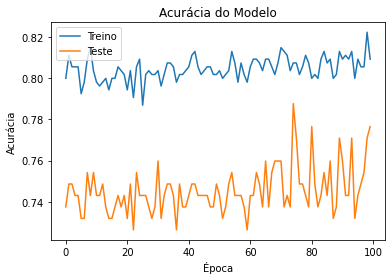

In [176]:
import matplotlib.pyplot as plt

# Plot acurácia de treino e validação
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

### Acurácia do Modelo

Usar o comando `model.evaluate()`

Para a métrica acurácia, retorna um score de acurácia `float` entre $0$ e $1$
    
> Obs: Regressão Logística acurácias: 0.69 Treino e 0.7 Teste

> Obs: *Support Vector Machines* acurácias: 0.79 Treino e 0.75 Teste

> Obs: Árvores de Decisão acurácias: 0.79 Treino e 0.79 Teste

> Obs: Florestas Aleatórias acurácias: 0.84 Treino e 0.82 Teste

In [183]:
model.eval()

train_pred = model(X_train)
train_pred = train_pred.detach().apply_(lambda x : 1 if x > 0.5 else 0)
train_acc = torch.sum(train_pred.flatten() == y_train) / train_pred.size(0)

test_pred = model(X_test)
test_pred = test_pred.detach().apply_(lambda x : 1 if x > 0.5 else 0)
test_acc = torch.sum(test_pred.flatten() == y_test) / test_pred.size(0)

print(f"Acurácia de Treino: {train_acc}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {test_acc}")

Acurácia de Treino: 0.8093457818031311

 ---------------------------

Acurácia de Teste: 0.7765362858772278


## Referências

* Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.
* Kingma, Diederik P., and Jimmy Ba. “Adam: A Method for Stochastic Optimization,” December 22, 2014. https://arxiv.org/abs/1412.6980.
* Nesterov, Y. A method of solving a convex programming problem with convergence rate O(1/sqr(k)). Soviet Mathematics Doklady, 27:372–376, 1983.
* Srivastava, Nitish, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. “Dropout: A Simple Way to Prevent Neural Networks from Overfitting.” Journal of Machine Learning Research 15, no. 56 (2014): 1929–58.